# Table of Contents
* [World Bank Data Analysis: Income Inequality](#World-Bank-Data-Analysis:-Income-Inequality)
* [Selected Indices from 1980-2010](#Selected-Indices-from-1980-2010)
* [Exploratory Analysis](#Exploratory-Analysis)
	* [Clean up aggregates](#Clean-up-aggregates)
	* [Percentage Change](#Percentage-Change)
* [Scale Data](#Scale-Data)
* [Merge Data](#Merge-Data)
* [Output to Excel](#Output-to-Excel)


# World Bank Data Analysis: Income Inequality

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium 
import mplleaflet
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid", color_codes=True)

# Selected Indices from 1980-2010

+ GDP
+ Income Percentage held by top 10%
+ Total Population

In [2]:
ind = ['NY.GDP.MKTP.KN','SI.DST.10TH.10', 'SP.POP.TOTL']
ind_name = ['gdp','income_10pc','pop']

In [3]:
dat = wb.download(indicator=ind, country='all', start=1980, end=2010).fillna(0)
dat.columns = ind_name
dat.tail(10)

gdp  income_10pc         pop
country  year                                       
Zimbabwe 1989  1.158729e+10          0.0  10184966.0
         1988  1.101456e+10          0.0   9866776.0
         1987  1.024111e+10          0.0   9535657.0
         1986  1.012461e+10          0.0   9198874.0
         1985  9.916456e+09          0.0   8862601.0
         1984  9.272535e+09          0.0   8528328.0
         1983  9.452835e+09          0.0   8197564.0
         1982  9.305317e+09          0.0   7876414.0
         1981  9.066479e+09          0.0   7571965.0
         1980  8.057272e+09          0.0   7289083.0

In [4]:
len(dat)

7688

# Exploratory Analysis

## Clean up aggregates

In [5]:
dat_01 = dat.reset_index()

In [6]:
country_name = dat_01['country'].unique()
country_name = country_name[34:]

In [7]:
todrop = dat_01['country'].isin(country_name)
dat_01 = dat_01[todrop]
dat_01.head()

,country,year,gdp,income_10pc,pop
1054,Afghanistan,2010,3.688652e+11,0.0,27962207.0
1055,Afghanistan,2009,3.401770e+11,0.0,27207291.0
1056,Afghanistan,2008,2.810901e+11,0.0,26528741.0
1057,Afghanistan,2007,2.712927e+11,0.0,25877544.0
1058,Afghanistan,2006,2.385196e+11,0.0,25183615.0


## Percentage Change 

In [8]:
pct_change_10 = dat.pct_change(periods=10).fillna(0)
pct_change_10.reset_index(inplace=True)
pct_change_10 = pct_change_10[pct_change_10['country'].isin(country_name)]
pct_change_10.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)
pct_change_10.columns = ['country','year','gdp_pctchg_10', 'inc_pctchg_10','pop_pctchg_10']
pct_change_10.head()

,country,year,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10
1054,Afghanistan,2010,0.0,0.0,-0.994615
1055,Afghanistan,2009,0.0,0.0,-0.994669
1056,Afghanistan,2008,0.0,0.0,-0.994710
1057,Afghanistan,2007,0.0,0.0,-0.994748
1058,Afghanistan,2006,0.0,0.0,-0.994798


In [9]:
pct_change_30 = dat.pct_change(periods=30).fillna(0)
pct_change_30.reset_index(inplace=True)
pct_change_30 = pct_change_30[pct_change_30['country'].isin(country_name)]
pct_change_30.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)
pct_change_30.columns = ['country','year','gdp_pctchg_30', 'inc_pctchg_30','pop_pctchg_30']
pct_change_30.head()

,country,year,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
1054,Afghanistan,2010,0.0,0.0,-0.995913
1055,Afghanistan,2009,0.0,0.0,-0.995974
1056,Afghanistan,2008,0.0,0.0,-0.996026
1057,Afghanistan,2007,0.0,0.0,-0.996076
1058,Afghanistan,2006,0.0,0.0,-0.996134


In [10]:
dat.median()

gdp            2.559395e+10
income_10pc    0.000000e+00
pop            6.270391e+06
dtype: float64

In [11]:
dat.mean()

gdp            3.058614e+13
income_10pc    4.479376e+00
pop            1.585289e+08
dtype: float64

# Scale Data

In [12]:
from sklearn.preprocessing import *

In [13]:
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
maxabs = MaxAbsScaler()

In [14]:
df_robust_scaled = dat_01.copy()
df_robust_scaled['gdp_rs'] = robust_scaler.fit_transform(dat_01['gdp']);
df_robust_scaled['inc_rs'] = robust_scaler.fit_transform(dat_01['income_10pc']);
df_robust_scaled['pop_rs'] = robust_scaler.fit_transform(dat_01['pop']);
df_robust_scaled['inc_gdpPop'] = df_robust_scaled['inc_rs']/(df_robust_scaled['gdp_rs']+df_robust_scaled['pop_rs'])

C:\Users\arsha_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\arsha_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:987: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\arsha_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has 

In [15]:
df_robust_scaled['inc_gdp'] = df_robust_scaled['inc_rs']/df_robust_scaled['gdp_rs']
df_robust_scaled['inc_pop'] = df_robust_scaled['inc_rs']/df_robust_scaled['pop_rs']

In [16]:
df_robust_scaled.drop(['gdp','income_10pc','pop'], axis=1, inplace=True)

In [17]:
df_robust_scaled.head()

,country,year,gdp_rs,inc_rs,pop_rs,inc_gdpPop,inc_gdp,inc_pop
1054,Afghanistan,2010,0.256335,0.0,1.584875,0.0,0.0,0.0
1055,Afghanistan,2009,0.231228,0.0,1.533607,0.0,0.0,0.0
1056,Afghanistan,2008,0.179519,0.0,1.487526,0.0,0.0,0.0
1057,Afghanistan,2007,0.170945,0.0,1.443303,0.0,0.0,0.0
1058,Afghanistan,2006,0.142263,0.0,1.396177,0.0,0.0,0.0


In [18]:
df_robust_scaled.max()

country       Zimbabwe
year              2010
gdp_rs         6007.05
inc_rs           61.49
pop_rs          90.531
inc_gdpPop     27061.8
inc_gdp        97902.3
inc_pop        20518.2
dtype: object

In [21]:
df_robust_scaled.min()

country       Afghanistan
year                 1980
gdp_rs          -0.066476
inc_rs                  0
pop_rs           -0.31407
inc_gdpPop       -15468.3
inc_gdp      -1.31752e+06
inc_pop           -274430
dtype: object

# Merge Data

In [22]:
merged_noScale = dat_01.merge(pct_change_10,on=['country','year'], how='outer').merge(pct_change_30,on=['country','year'], how='outer')

In [23]:
merged_df = df_robust_scaled.merge(pct_change_10,on=['country','year'], how='outer').merge(pct_change_30,on=['country','year'], how='outer')

In [24]:
merged_noScale.head()

,country,year,gdp,income_10pc,pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,Afghanistan,2010,3.688652e+11,0.0,27962207.0,0.0,0.0,-0.994615,0.0,0.0,-0.995913
1,Afghanistan,2009,3.401770e+11,0.0,27207291.0,0.0,0.0,-0.994669,0.0,0.0,-0.995974
2,Afghanistan,2008,2.810901e+11,0.0,26528741.0,0.0,0.0,-0.994710,0.0,0.0,-0.996026
3,Afghanistan,2007,2.712927e+11,0.0,25877544.0,0.0,0.0,-0.994748,0.0,0.0,-0.996076
4,Afghanistan,2006,2.385196e+11,0.0,25183615.0,0.0,0.0,-0.994798,0.0,0.0,-0.996134


In [25]:
merged_noScale['inc_gdp'] = merged_noScale['income_10pc']/merged_noScale['gdp']
merged_noScale['inc_pop'] = merged_noScale['income_10pc']/merged_noScale['pop']
merged_noScale['gdp_pop'] = merged_noScale['gdp']/merged_noScale['pop']
merged_noScale['inc_gdpPop'] = merged_noScale['income_10pc']/(merged_noScale['gdp']+merged_noScale['pop'])
merged_noScale.head()

,country,year,gdp,income_10pc,pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30,inc_gdp,inc_pop,gdp_pop,inc_gdpPop
0,Afghanistan,2010,3.688652e+11,0.0,27962207.0,0.0,0.0,-0.994615,0.0,0.0,-0.995913,0.0,0.0,13191.561210,0.0
1,Afghanistan,2009,3.401770e+11,0.0,27207291.0,0.0,0.0,-0.994669,0.0,0.0,-0.995974,0.0,0.0,12503.157580,0.0
2,Afghanistan,2008,2.810901e+11,0.0,26528741.0,0.0,0.0,-0.994710,0.0,0.0,-0.996026,0.0,0.0,10595.681374,0.0
3,Afghanistan,2007,2.712927e+11,0.0,25877544.0,0.0,0.0,-0.994748,0.0,0.0,-0.996076,0.0,0.0,10483.711584,0.0
4,Afghanistan,2006,2.385196e+11,0.0,25183615.0,0.0,0.0,-0.994798,0.0,0.0,-0.996134,0.0,0.0,9471.222567,0.0


In [26]:
rs_grouped_ctry_median = merged_df.groupby('country').median()
rs_grouped_ctry_median.reset_index(inplace=True)

In [27]:
rs_grouped_ctry_median.head()

,country,gdp_rs,inc_rs,pop_rs,inc_gdpPop,inc_gdp,inc_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,Afghanistan,-0.066476,0.0,0.824971,0.0,-0.0,0.0,0.000000,0.0,-0.360284,0.000000,0.0,-0.996936
1,Albania,0.251905,0.0,-0.106873,0.0,0.0,-0.0,0.000000,0.0,-0.069961,0.000000,0.0,-0.799131
2,Algeria,0.122773,0.0,1.648853,0.0,0.0,0.0,-0.153735,0.0,-0.134656,-0.392848,0.0,8.011372
3,American Samoa,-0.066476,0.0,-0.310479,-0.0,-0.0,-0.0,0.000000,0.0,-0.257726,-1.000000,0.0,-0.998152
4,Andorra,-0.065403,0.0,-0.309734,-0.0,-0.0,-0.0,-0.255263,0.0,-0.199523,0.000000,0.0,0.195653


In [28]:
rs_grouped_year_median = merged_df.groupby('year').mean()
rs_grouped_year_median.reset_index(inplace=True)

In [29]:
rs_grouped_year_median.head()

,year,gdp_rs,inc_rs,pop_rs,inc_gdpPop,inc_gdp,inc_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,1980,12.157144,0.000000,1.085910,0.000000,0.000000,0.000000,-0.300212,-0.070093,-0.179718,-0.609114,-0.364486,-0.365175
1,1981,12.613258,1.354813,1.110520,2.782616,-0.188586,-1.775442,-0.282964,-0.060693,-0.177377,55.974168,0.000000,41.460283
2,1982,13.487640,0.216028,1.136087,0.024061,0.362376,0.025772,-0.271954,-0.134744,-0.172741,77.936685,-0.042056,41.654573
3,1983,14.556007,0.441028,1.161847,0.040121,0.461082,0.045866,-0.269748,-0.126374,-0.169162,77.495043,-0.004673,41.815405
4,1984,16.711837,1.167897,1.187526,0.588777,4.382643,1.942193,-0.257627,-0.112655,-0.165122,143.524009,-0.009493,41.998991


In [30]:
rs_grouped_ctry_median = merged_df.groupby('country').mean()
rs_grouped_ctry_median.reset_index(inplace=True)

In [33]:
rs_grouped_ctry_median.max()

country           Zimbabwe
gdp_rs             3223.73
inc_rs             38.6816
pop_rs             80.2154
inc_gdpPop         933.579
inc_gdp            4231.28
inc_pop            661.878
gdp_pctchg_10      17291.6
inc_pctchg_10            0
pop_pctchg_10      1546.57
gdp_pctchg_30       524434
inc_pctchg_30    0.0345873
pop_pctchg_30      3481.78
dtype: object

In [34]:
rs_grouped_ctry_median.min()

country          Afghanistan
gdp_rs             -0.066476
inc_rs                     0
pop_rs             -0.313448
inc_gdpPop          -176.043
inc_gdp             -42470.9
inc_pop             -8678.43
gdp_pctchg_10      -0.745989
inc_pctchg_10      -0.346486
pop_pctchg_10      -0.659326
gdp_pctchg_30      -0.999999
inc_pctchg_30       -0.83871
pop_pctchg_30       -0.99655
dtype: object

# Output to Excel

In [32]:
rs_grouped_ctry_median.to_excel('robustscaled_grp_ctry.xlsx')
rs_grouped_year_median.to_excel('robustscaled_grp_year.xlsx')

# Visualisations

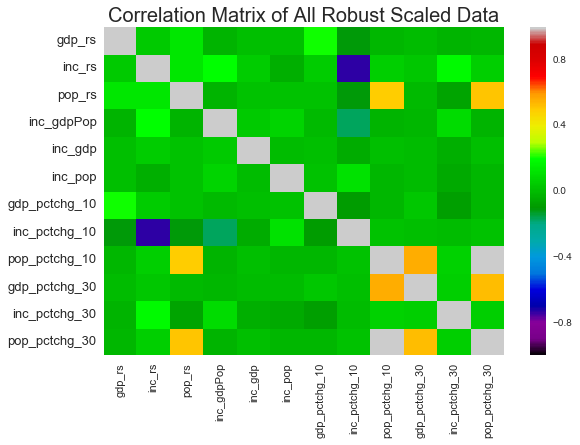

In [35]:
merged_rob_corr = rs_grouped_ctry_median.corr()
sns.heatmap(merged_rob_corr, cmap=plt.cm.spectral)

plt.xticks(rotation='vertical', fontsize=11)
plt.yticks(fontsize=13)
plt.title('Correlation Matrix of All Robust Scaled Data',fontsize=20)